In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import datetime
import requests
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from itertools import combinations
from collections import OrderedDict 

%matplotlib inline

/Users/scottlew/miniconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## READ IN MLB STATS FOR 1876-2018 SEASONS 

## Note: No salary data is used for regression in this case.

In [2]:
# read data from csv file for 2001-2018 MLB seasons
#df = pd.read_csv('MLB_STATS_1900-2018_BP.csv')
df = pd.read_csv('MLB_STATS_1876-2018_BP.csv')
#df = pd.read_csv('MLB_KBO_STATS_1876-2018_BP.csv') # korean baseball stats 2008-2018

In [3]:
df.head()

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SO_y,SO/W,SO9,SV,W,W-L%,WHIP,WP,cSho,tSho
0,ATH,21,26.0,6.30,60,2414,2387,378,646,79,...,22,0.54,0.4,2,14,0.237,1.498,33,1.0,1.0
1,BSN,17,24.7,6.73,70,2780,2722,471,723,96,...,77,0.74,1.1,7,39,0.557,1.323,46,3.0,3.0
2,CHC,11,25.9,9.45,66,2818,2748,624,926,131,...,51,1.76,0.8,4,52,0.788,1.075,3,8.0,9.0
3,CIN,13,24.5,3.66,65,2413,2372,238,555,51,...,60,1.76,0.9,0,9,0.138,1.496,28,0.0,0.0
4,HAR,12,26.3,6.22,69,2703,2664,429,711,96,...,114,4.22,1.6,0,47,0.691,0.957,15,11.0,11.0


In [4]:
df.shape

(2815, 65)

In [5]:
df.tail()

,Tm,#Bat,BatAge,R/G,G_x,PA,AB,R_x,H_x,2B,...,SO_y,SO/W,SO9,SV,W,W-L%,WHIP,WP,cSho,tSho
2810,STL,49,28.0,4.69,162,6200,5498,759,1369,248,...,1337,2.25,8.3,43,88,0.543,1.338,63,1.0,8.0
2811,TBR,54,27.1,4.42,162,6195,5475,716,1415,274,...,1421,2.84,8.8,52,90,0.556,1.199,55,0.0,14.0
2812,TEX,50,27.4,4.55,162,6163,5453,737,1308,266,...,1121,2.28,7.1,42,67,0.414,1.403,57,0.0,5.0
2813,TOR,63,28.9,4.38,162,6076,5477,709,1336,320,...,1298,2.36,8.1,39,73,0.451,1.414,71,0.0,3.0
2814,WSN,53,27.6,4.76,162,6288,5517,771,1402,284,...,1417,2.91,8.8,40,82,0.506,1.250,42,1.0,7.0


In [6]:
df.dtypes

Tm         object
#Bat        int64
BatAge    float64
R/G       float64
G_x         int64
PA          int64
AB          int64
R_x         int64
H_x         int64
2B          int64
3B          int64
HR_x        int64
RBI       float64
SB        float64
CS        float64
BB_x        int64
SO_x        int64
BA        float64
OBP       float64
SLG       float64
OPS       float64
OPS+        int64
TB          int64
GDP       float64
HBP_x     float64
SH        float64
SF        float64
IBB_x     float64
LOB_x     float64
Year        int64
           ...   
CG          int64
ER          int64
ERA       float64
ERA+        int64
FIP       float64
G_y         int64
GF          int64
GS          int64
H_y         int64
H9        float64
HBP_y     float64
HR_y        int64
HR9       float64
IBB_y     float64
IP        float64
L           int64
LOB_y     float64
PAge      float64
R_y         int64
RA/G      float64
SO_y        int64
SO/W      float64
SO9       float64
SV          int64
W         

In [7]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

In [8]:
df.Year.value_counts()

1884    33
2017    30
2015    30
1998    30
2002    30
2004    30
2006    30
2008    30
2010    30
2012    30
2014    30
2016    30
2018    30
2005    30
2013    30
1999    30
2001    30
2003    30
2007    30
2009    30
2011    30
1993    28
1997    28
1996    28
1994    28
1995    28
1992    26
1990    26
1988    26
1986    26
        ..
1941    16
1905    16
1911    16
1901    16
1883    16
1957    16
1955    16
1953    16
1951    16
1947    16
1949    16
1885    16
1887    16
1889    16
1882    14
1892    12
1897    12
1895    12
1893    12
1894    12
1896    12
1898    12
1899    12
1881     8
1900     8
1879     8
1880     8
1876     8
1877     6
1878     6
Name: Year, Length: 142, dtype: int64

In [9]:
correlation = df.corr()

In [10]:
W_corr = correlation.W
W_corr

#Bat      0.178940
BatAge    0.352487
R/G       0.224332
G_x       0.582830
PA        0.629993
AB        0.599076
R_x       0.626056
H_x       0.649828
2B        0.509120
3B        0.014362
HR_x      0.447111
RBI       0.648062
SB       -0.008447
CS       -0.016638
BB_x      0.586737
SO_x      0.304754
BA        0.353061
OBP       0.533598
SLG       0.521056
OPS       0.564913
OPS+      0.549647
TB        0.649951
GDP       0.077197
HBP_x     0.127109
SH       -0.018893
SF        0.354130
IBB_x     0.354443
LOB_x     0.359822
Year      0.352521
#P        0.186490
            ...   
CG       -0.175771
ER        0.081558
ERA      -0.242158
ERA+      0.563912
FIP      -0.025223
G_y       0.582832
GF        0.356504
GS        0.582657
H_y       0.240439
H9       -0.487337
HBP_y    -0.092135
HR_y      0.256221
HR9       0.207969
IBB_y    -0.050684
IP        0.612138
L        -0.332367
LOB_y     0.042761
PAge      0.390851
R_y      -0.162247
RA/G     -0.607445
SO_y      0.441019
SO/W      0.

In [11]:
#df.SV.isna().sum()
df.isnull().sum()

Tm           0
#Bat         0
BatAge       0
R/G          0
G_x          0
PA           0
AB           0
R_x          0
H_x          0
2B           0
3B           0
HR_x         0
RBI         15
SB         123
CS         717
BB_x         0
SO_x         0
BA           0
OBP          0
SLG          0
OPS          0
OPS+         0
TB           0
GDP        909
HBP_x      110
SH         253
SF        1197
IBB_x      989
LOB_x      445
Year         0
          ... 
CG           0
ER           0
ERA          0
ERA+         0
FIP          0
G_y          0
GF           0
GS           0
H_y          0
H9           0
HBP_y      110
HR_y         0
HR9          0
IBB_y      989
IP           0
L            0
LOB_y      445
PAge         0
R_y          0
RA/G         0
SO_y         0
SO/W         0
SO9          0
SV           0
W            0
W-L%         0
WHIP         0
WP           0
cSho         8
tSho         8
Length: 65, dtype: int64

In [12]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

## EDA

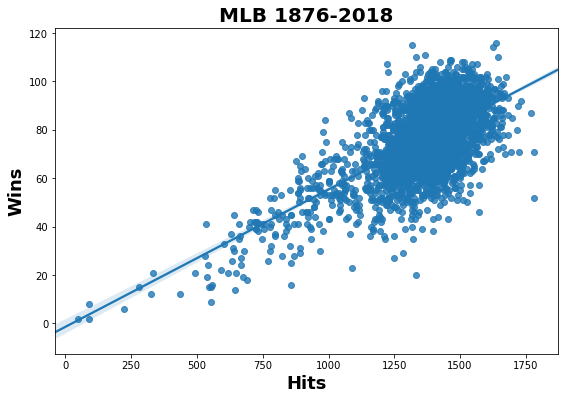

In [13]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="H_x", y="W", data = df)
plt.xlabel('Hits', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)
#plt.savefig('MLB_W&OPS_5seasons.png')

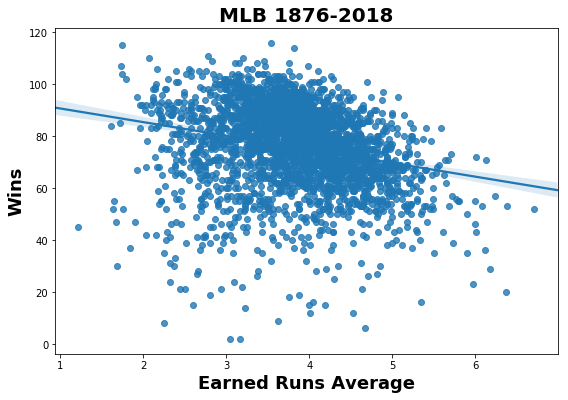

In [14]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="ERA", y="W", data = df)
plt.xlabel('Earned Runs Average', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)

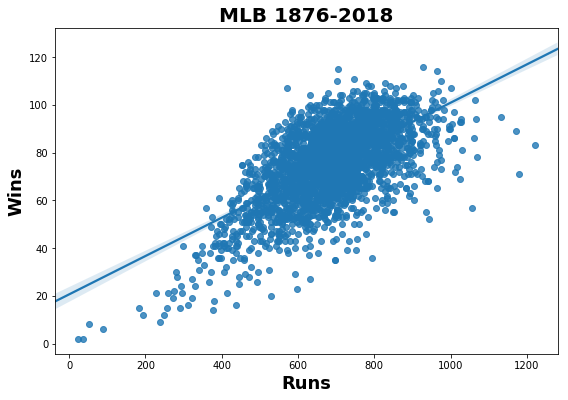

In [15]:
plt.figure(figsize = [9,6]) # [width, height]
plt.title('MLB 1876-2018',weight = 'bold', size =20)
sns.regplot(x="R_x", y="W", data = df)
plt.xlabel('Runs', weight = 'bold',size =18)
plt.ylabel('Wins', weight = 'bold', size=18)

In [16]:
df.columns

Index(['Tm', '#Bat', 'BatAge', 'R/G', 'G_x', 'PA', 'AB', 'R_x', 'H_x', '2B',
       '3B', 'HR_x', 'RBI', 'SB', 'CS', 'BB_x', 'SO_x', 'BA', 'OBP', 'SLG',
       'OPS', 'OPS+', 'TB', 'GDP', 'HBP_x', 'SH', 'SF', 'IBB_x', 'LOB_x',
       'Year', '#P', 'BB_y', 'BB9', 'BF', 'BK', 'CG', 'ER', 'ERA', 'ERA+',
       'FIP', 'G_y', 'GF', 'GS', 'H_y', 'H9', 'HBP_y', 'HR_y', 'HR9', 'IBB_y',
       'IP', 'L', 'LOB_y', 'PAge', 'R_y', 'RA/G', 'SO_y', 'SO/W', 'SO9', 'SV',
       'W', 'W-L%', 'WHIP', 'WP', 'cSho', 'tSho'],
      dtype='object')

In [17]:
# Find teams with the most wins in a season!
df.sort_values(['W'],ascending=False).groupby('Tm').head(3)[['Tm','W']]

,Tm,W
2299,SEA,116
416,CHC,115
2234,NYY,114
1203,CLE,111
473,PIT,110
774,NYY,110
1468,BAL,109
1321,NYY,109
1617,CIN,108
1908,NYM,108


## Seatle Mariners had 116 wins in 2001 season,tying the major league record for wins set by the Chicago Cubs in 1906, and setting the record for wins by an American League team. But, why does CHC, the Chicago Cubs, shows a total of 115 wins instead of 116?

In [18]:
# Top 10 teams in MLB by number of wins from 1876-2018!
df.groupby(['Tm'])['W'].sum().sort_values(ascending=False).head(10)

Tm
CHC    10832
STL    10800
CIN    10564
PIT    10403
NYY    10187
PHI     9674
BOS     9662
CLE     9438
DET     9218
CHW     9116
Name: W, dtype: int64

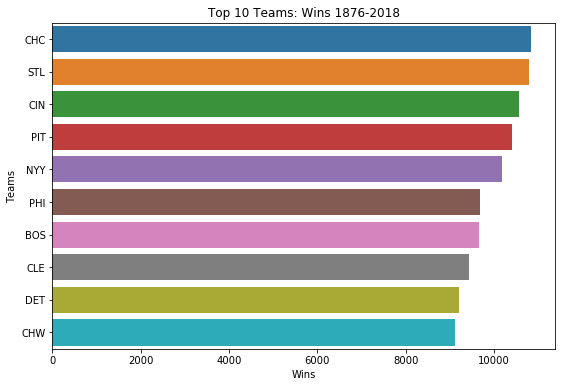

In [19]:
Top_10_Wins = df.groupby(['Tm'])['W'].sum().sort_values(ascending=False).head(10)
Team_Win_Names = Top_10_Wins.index.values
W_Top10 =  Top_10_Wins.values
#plt.bar(Team_Names, BA_Top10)
#sns.barplot(x =Team_Names, y = BA_Top10 )
fig, ax = plt.subplots(figsize=(9, 6))
sns.barplot(x = W_Top10,y = Team_Win_Names)
plt.ylabel('Teams')
plt.xlabel('Wins')
plt.title('Top 10 Teams: Wins 1876-2018')

## Chicago Cubs (CHC) has the most wins of any team for all MLB seasons from 1876-2018. So, why are they known as the 'lovable losers'??

In [20]:
df.groupby(['Tm'])['W'].sum()

Tm
ALT        6
ANA      582
ARI     1593
ATH       14
ATL     4241
BAL     5798
BLA      118
BLN      642
BLU       57
BOS     9662
BRG       26
BRO     5617
BSN     5117
BTT      147
BUF      503
BWW       76
CAL     2440
CHC    10832
CHI      248
CHW     9116
CIN    10564
CKK       43
CLE     9438
CLV      979
COL     2180
COR       69
CPI       41
DET     9218
DTN      426
FLA     1356
       ...  
PHA     4517
PHI     9674
PHK       21
PHQ       68
PIT    10403
PRO      438
RIC       12
ROC       63
SDP     3601
SEA     3060
SEP       64
SFG     4924
SLB     3413
SLM      320
STL    10800
STP        2
SYR       76
TBD      576
TBR      945
TEX     3610
TOL      113
TOR     3233
TRO      134
WAS       55
WHS      755
WIL        2
WOR       90
WSA      740
WSH     4223
WSN     1129
Name: W, Length: 88, dtype: int64

In [21]:
# Top 10 teams in MLB by team batting average from 1876-2018!
df.groupby(['Tm'])['BA'].mean().sort_values(ascending=False).head(10)
Top_10_BA = df.groupby(['Tm'])['BA'].mean().sort_values(ascending=False).head(10)

In [22]:
Top_10_BA

Tm
BLN    0.306000
BLA    0.285500
NYI    0.284000
PHQ    0.278000
BWW    0.277000
ATH    0.271000
COR    0.271000
NYG    0.270880
ANA    0.270429
COL    0.269200
Name: BA, dtype: float64

In [23]:
Team_Names = Top_10_BA.index.values
Team_Names

array(['BLN', 'BLA', 'NYI', 'PHQ', 'BWW', 'ATH', 'COR', 'NYG', 'ANA', 'COL'], dtype=object)

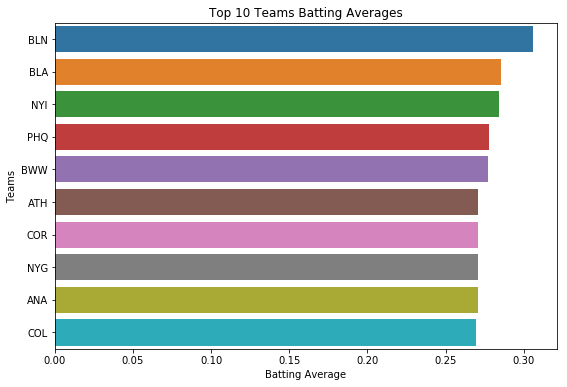

In [24]:
Team_Names = Top_10_BA.index.values
BA_Top10 =  Top_10_BA.values
#plt.bar(Team_Names, BA_Top10)
#sns.barplot(x =Team_Names, y = BA_Top10 )
fig, ax = plt.subplots(figsize=(9, 6))
sns.barplot(x = BA_Top10,y = Team_Names)
plt.ylabel('Teams')
plt.xlabel('Batting Average')
plt.title('Top 10 Teams Batting Averages')

## BLN, the original Baltimore Orioles have #1 Team Batting Average & BLA, the second Baltimore Orioles have the #2 Team Batting Average

In [25]:
#  10 teams with lowest batting average in MLB from 1876-2018!
df.groupby(['Tm'])['BA'].mean().sort_values().head(10)

Tm
WIL    0.175000
STP    0.180000
BRG    0.221000
RIC    0.222000
KCC    0.223667
WAS    0.225500
NYU    0.227000
KCN    0.228000
CPI    0.231000
CKK    0.234000
Name: BA, dtype: float64

In [26]:
df.groupby(['Tm'])['BA'].mean()

Tm
ALT    0.248000
ANA    0.270429
ARI    0.256500
ATH    0.271000
ATL    0.256808
BAL    0.253513
BLA    0.285500
BLN    0.306000
BLU    0.245000
BOS    0.266908
BRG    0.221000
BRO    0.265216
BSN    0.261714
BTT    0.268500
BUF    0.257200
BWW    0.277000
CAL    0.252750
CHC    0.263373
CHI    0.259667
CHW    0.260085
CIN    0.261142
CKK    0.234000
CLE    0.265233
CLV    0.262059
COL    0.269200
COR    0.271000
CPI    0.231000
DET    0.265179
DTN    0.254125
FLA    0.260222
         ...   
PHA    0.264469
PHI    0.260659
PHK    0.245000
PHQ    0.278000
PIT    0.263875
PRO    0.255375
RIC    0.222000
ROC    0.239000
SDP    0.249694
SEA    0.259976
SEP    0.234000
SFG    0.255250
SLB    0.260808
SLM    0.251400
STL    0.265761
STP    0.180000
SYR    0.243000
TBD    0.262889
TBR    0.250545
TEX    0.264826
TOL    0.241500
TOR    0.260341
TRO    0.245000
WAS    0.225500
WHS    0.257769
WIL    0.175000
WOR    0.238333
WSA    0.234545
WSH    0.261383
WSN    0.254500
Name: BA, Length: 88,

In [27]:
#df[df.Tm == 'BLA'].Year

In [28]:
#df[df.Tm == 'BLN'].Year

In [29]:
#  10 teams with lowest earned runs average in MLB from 1876-2018!
df.groupby(['Tm'])['ERA'].mean().sort_values().head(10)

Tm
HAR    1.995000
PRO    2.195000
COR    2.380000
NEW    2.600000
MLG    2.600000
CPI    2.720000
CHI    2.823333
TRO    2.895000
NYU    2.940000
SLM    2.978000
Name: ERA, dtype: float64

## Earned Run Average (ERA) Through The Years 1876-2018

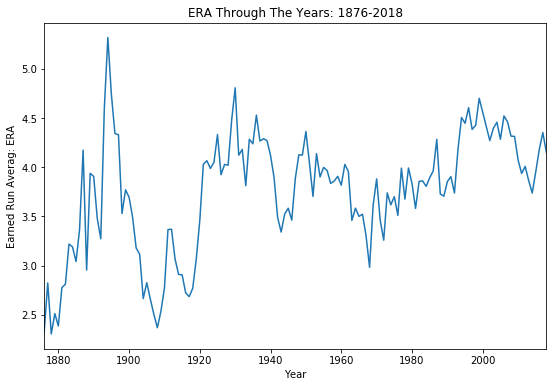

In [30]:
fig, ax = plt.subplots(figsize=(9, 6))
df.groupby(['Year'])['ERA'].mean().plot()
plt.xlabel('Year')
plt.ylabel('Earned Run Averag: ERA')
plt.title('ERA Through The Years: 1876-2018')

## Deadball & Liveball Eras: Is There A Difference In Batting Averages?

## The live-ball era, also referred to as the lively ball era, is the period in Major League Baseball beginning in 1920. Prior to the rule changes in 1920, the dead-ball era, the same ball would often be used throughout an entire game, only being replaced if it began to unravel. Prior to the rule changes in 1920, the same ball would often be used throughout an entire game, only being replaced if it began to unravel.During the dead-ball era, pitchers were also allowed to deface or scuff the ball, apply foreign substances to it. The dead-ball era came to an end after the fatal beaning of Cleveland Indians player Ray Chapman during the 1920 season. As a result, the rules were changed. Starting in 1920, balls were replaced at the first sign of wear, resulting in a ball that was much brighter and easier for a hitter to see. Additionally, pitchers were no longer allowed to deface, scuff, or apply foreign substances to the ball. Note: information taken from Wikipedia.

In [31]:
# Note 1920 was the year that rules changed regarding the usage of a ball during a baseball game
mask_dead = df['Year'] < 1920
mask_live = df['Year'] >= 1920

In [32]:
dead_BA = df[mask_dead].BA.mean()
live_BA = df[mask_live].BA.mean()
print()
print('Team Batting Average During the Dead Ball Era, pre-1920:')
print(dead_BA)
print()
print('Team Batting Average During the Live Ball Era, 1920-2018:')
print(live_BA)
print()
print('The observed difference in Team Batting Averages Between the Live Ball Era & the Dead Ball Era')
print(live_BA - dead_BA)
print()


Team Batting Average During the Dead Ball Era, pre-1920:
0.25790811638591127

Team Batting Average During the Live Ball Era, 1920-2018:
0.26193802035152575

The observed difference in Team Batting Averages Between the Live Ball Era & the Dead Ball Era
0.004029903965614479



# Permutation Sample Approach

## The Null Hypothesis: There is no difference in team batting averages from the Liveball & Deadball Eras. The Alternate Hypothesis: There is a difference in team batting averages from the two eras, most likely due to the rule changes which made it easier for hitters to see the ball.

In [33]:
# determine the number of observations in the dead era and the live era.
print(len(df[mask_dead].BA))
print(len(df[mask_live].BA))
print(df.shape[0])

len_dead = len(df[mask_dead].BA)
len_live = len(df[mask_live].BA)

653
2162
2815


In [34]:
# batting average for all seasons from 1876-2018
data_BA = df.BA
#Observed difference in mean batting averages between live & dead eras
empirical_BA_diff = live_BA - dead_BA
# permute the Batting Average data
permuted_data = np.random.permutation(data_BA)
# draw 2 permuted samples of appropriate length of batting average data.
perm_sample_dead = permuted_data[0:len_dead]
perm_sample_live = permuted_data[len_dead:]

In [35]:
# Initialize array of replicates: perm_replicates
size = 10000
perm_replicates = np.empty(size)
# permutation replicates
for i in range(size):
   # Generate permutation sample
    permuted_data = np.random.permutation(data_BA)
    perm_sample_dead = permuted_data[0:len_dead]
    perm_sample_live = permuted_data[len_dead:]
    perm_replicates[i] = np.mean(perm_sample_dead)- np.mean(perm_sample_live)

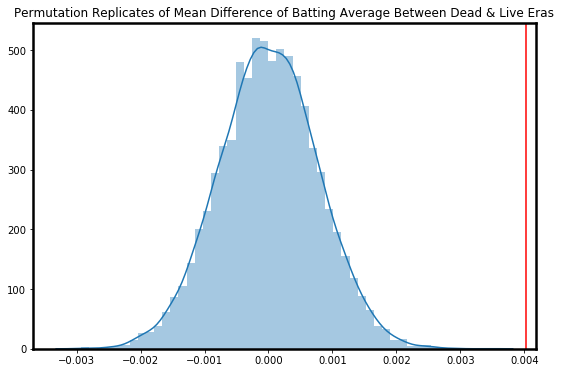

In [36]:
fig, ax = plt.subplots(figsize=(9, 6))
for axis in ['top','bottom','left','right']:
    ax.spines[axis].set_linewidth(2.5)
# plot distribution of permutation sample replicates    
sns.distplot(perm_replicates)
# plot the observed difference in batting averages for the two eras as a red vertical line
plt.axvline(x=empirical_BA_diff,color ='red')
plt.title('Permutation Replicates of Mean Difference of Batting Average Between Dead & Live Eras')

## Based on the Permutation Sample analysis, the difference in batting averages between the 'Dead Ball' & 'Live Ball' eras is statistically significant.

In [37]:
################################################################################

In [38]:
kb = pd.read_csv('KB_STATS_2008-2018_BP.csv') 
kb.head()

,Tm,BatAge,R/G_x,G_x,PA,AB,R_x,H_x,2B,3B,...,HBP_y,BK,WP,BF,WHIP,H9,HR9,BB9,SO9,SO/W
0,LG Twins,29.3,NaN,NaN,4742,4184,468,1070,164,23,...,72,3,46,4976,1.551,10.1,0.7,3.9,5.1,1.31
1,Doosan Bears,26.7,NaN,NaN,4974,4344,647,1198,166,37,...,69,5,45,4857,1.317,8.8,0.6,3.0,6.2,2.06
2,Kia Tigers,28.3,NaN,NaN,4831,4210,503,1095,188,28,...,77,5,52,4850,1.380,8.6,0.5,3.8,5.9,1.55
3,Lotte Giants,27.6,NaN,NaN,4890,4256,624,1200,199,22,...,47,2,42,4769,1.379,9.1,0.6,3.3,5.4,1.64
4,SK Wyverns,26.9,NaN,NaN,5003,4332,632,1222,215,23,...,55,2,35,4855,1.304,8.2,0.6,3.5,6.3,1.79


In [39]:
kb.isnull().sum()

Tm        0
BatAge    0
R/G_x     8
G_x       8
PA        0
AB        0
R_x       0
H_x       0
2B        0
3B        0
HR_x      0
RBI       0
SB        0
CS        0
BB_x      0
SO_x      0
BA        0
OBP       0
SLG       0
OPS       0
TB        0
GDP       0
HBP_x     0
SH        0
SF        0
IBB_x     0
Year      0
PAge      0
R/G_y     0
W         0
L         0
W-L%      0
ERA       0
RA9       0
G_y       0
GS        0
GF        0
CG        0
SHO       0
SV        0
IP        0
H_y       0
R_y       0
ER        0
HR_y      0
BB_y      0
IBB_y     0
SO_y      0
HBP_y     0
BK        0
WP        0
BF        0
WHIP      0
H9        0
HR9       0
BB9       0
SO9       0
SO/W      0
dtype: int64